In [92]:
# import necessary layers
from IPython.display import Image
from IPython.core.display import HTML 
import pydot
import graphviz 
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense
from tensorflow.keras import Model

from  keras import utils
from keras.datasets import cifar10

from keras.optimizers import SGD

In [29]:
#Input is a 224x224 RGB image, so 3 channels.
input = Input(shape =(224,224,3))

Image(url="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png")

In [31]:
# the deeper it gets the more filters to learn
#5 cnn blocks 16 layers
# can do face classification better than many other

Image(url= "https://machinethink.net/images/vggnet-convolutional-neural-network-iphone/VGGNet@2x.png")

In [19]:
# 1st Conv Block
#note the syntax here .same padding is done is 1st layer 
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [20]:
# 2nd Conv Block

x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [21]:
# 3rd Conv block 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x) 
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [22]:
# 4th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [23]:
# 5th Conv block

x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

In [24]:
# Fully connected layers  x = Flatten()(x) 
x = Dense(units = 4096, activation ='relu')(x) 
x = Dense(units = 4096, activation ='relu')(x) 
output = Dense(units = 1000, activation ='softmax')(x)

In [25]:
# creating the model

model = Model (inputs=input, outputs =output)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)      

In [72]:
# whole code
def vggm():
    input = Input(shape =(224,224,3))
    input = Input(shape =(32, 32, 3))

    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
    x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)# 2nd Conv Block

    x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)# 3rd Conv block

    x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)# 4th Conv block

    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)

    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
    x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)# Fully connected layers

    x = Flatten()(x)
    x = Dense(units = 128, activation ='relu')(x)
    #x = Dense(units = 4096, activation ='relu')(x)
    
    output = Dense(units = 10, activation ='softmax')(x)# creating the model for 10 class
    
    model = Model (inputs=input, outputs =output)
    return model
    



# Coding complete part

In [73]:

# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [74]:

# one hot encode target values
trainY = utils.to_categorical(trainy)
testY = utils.to_categorical(testy)


In [75]:

# scale pixels
def scale_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

trainX,testX=scale_pixels(trainX,testX)

In [76]:
Image (url="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/07/5-Step-Life-Cycle-for-Neural-Network-Models-in-Keras.png")

In [111]:
model=vggm()
model.summary()

Model: "functional_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_232 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_233 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_234 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_235 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 8, 8, 128)       

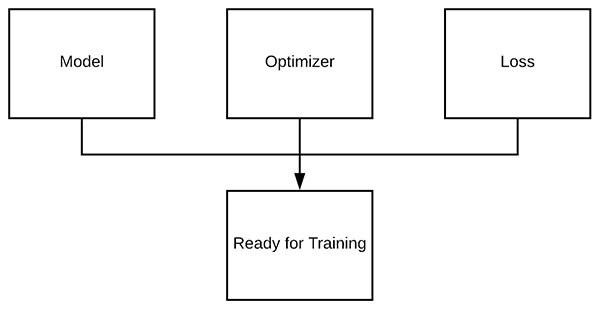

In [112]:
# compile model
model=vggm()
3#model.summary()
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
Image("https://pyimagesearch.com/wp-content/uploads/2018/09/keras_tutorial_step5.png")

In [113]:
history = model.fit(trainX, trainY, epochs=1, batch_size=64, validation_data=(testX, testY), verbose=0)

In [122]:
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)

313/313 [==============================] - 53s 170ms/step - loss: 2.3022 - accuracy: 0.1000s - loss: 2.3022 - ac


In [123]:

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    import matplotlib.pyplot as pyplot
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
   
    

> 10.000


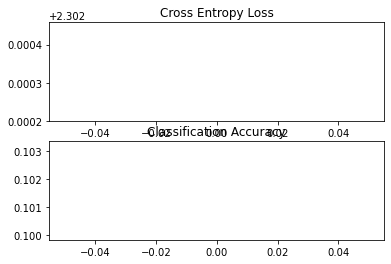

In [124]:
print('> %.3f' % (acc * 100.0))
# learning curves
summarize_diagnostics(history)